## Data Set – `Winequality-red.`

## Expectations and Steps:-

- Apply Data Cleaning to the Datasets and then apply Agglomerative clustering for find pattern and the best value for the following features.

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH


In [40]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset.

In [41]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## check shape.

In [42]:
df.shape

(1599, 12)

## Lets visualize with pairwise plot, (in this dataset the target(classes) are given.)

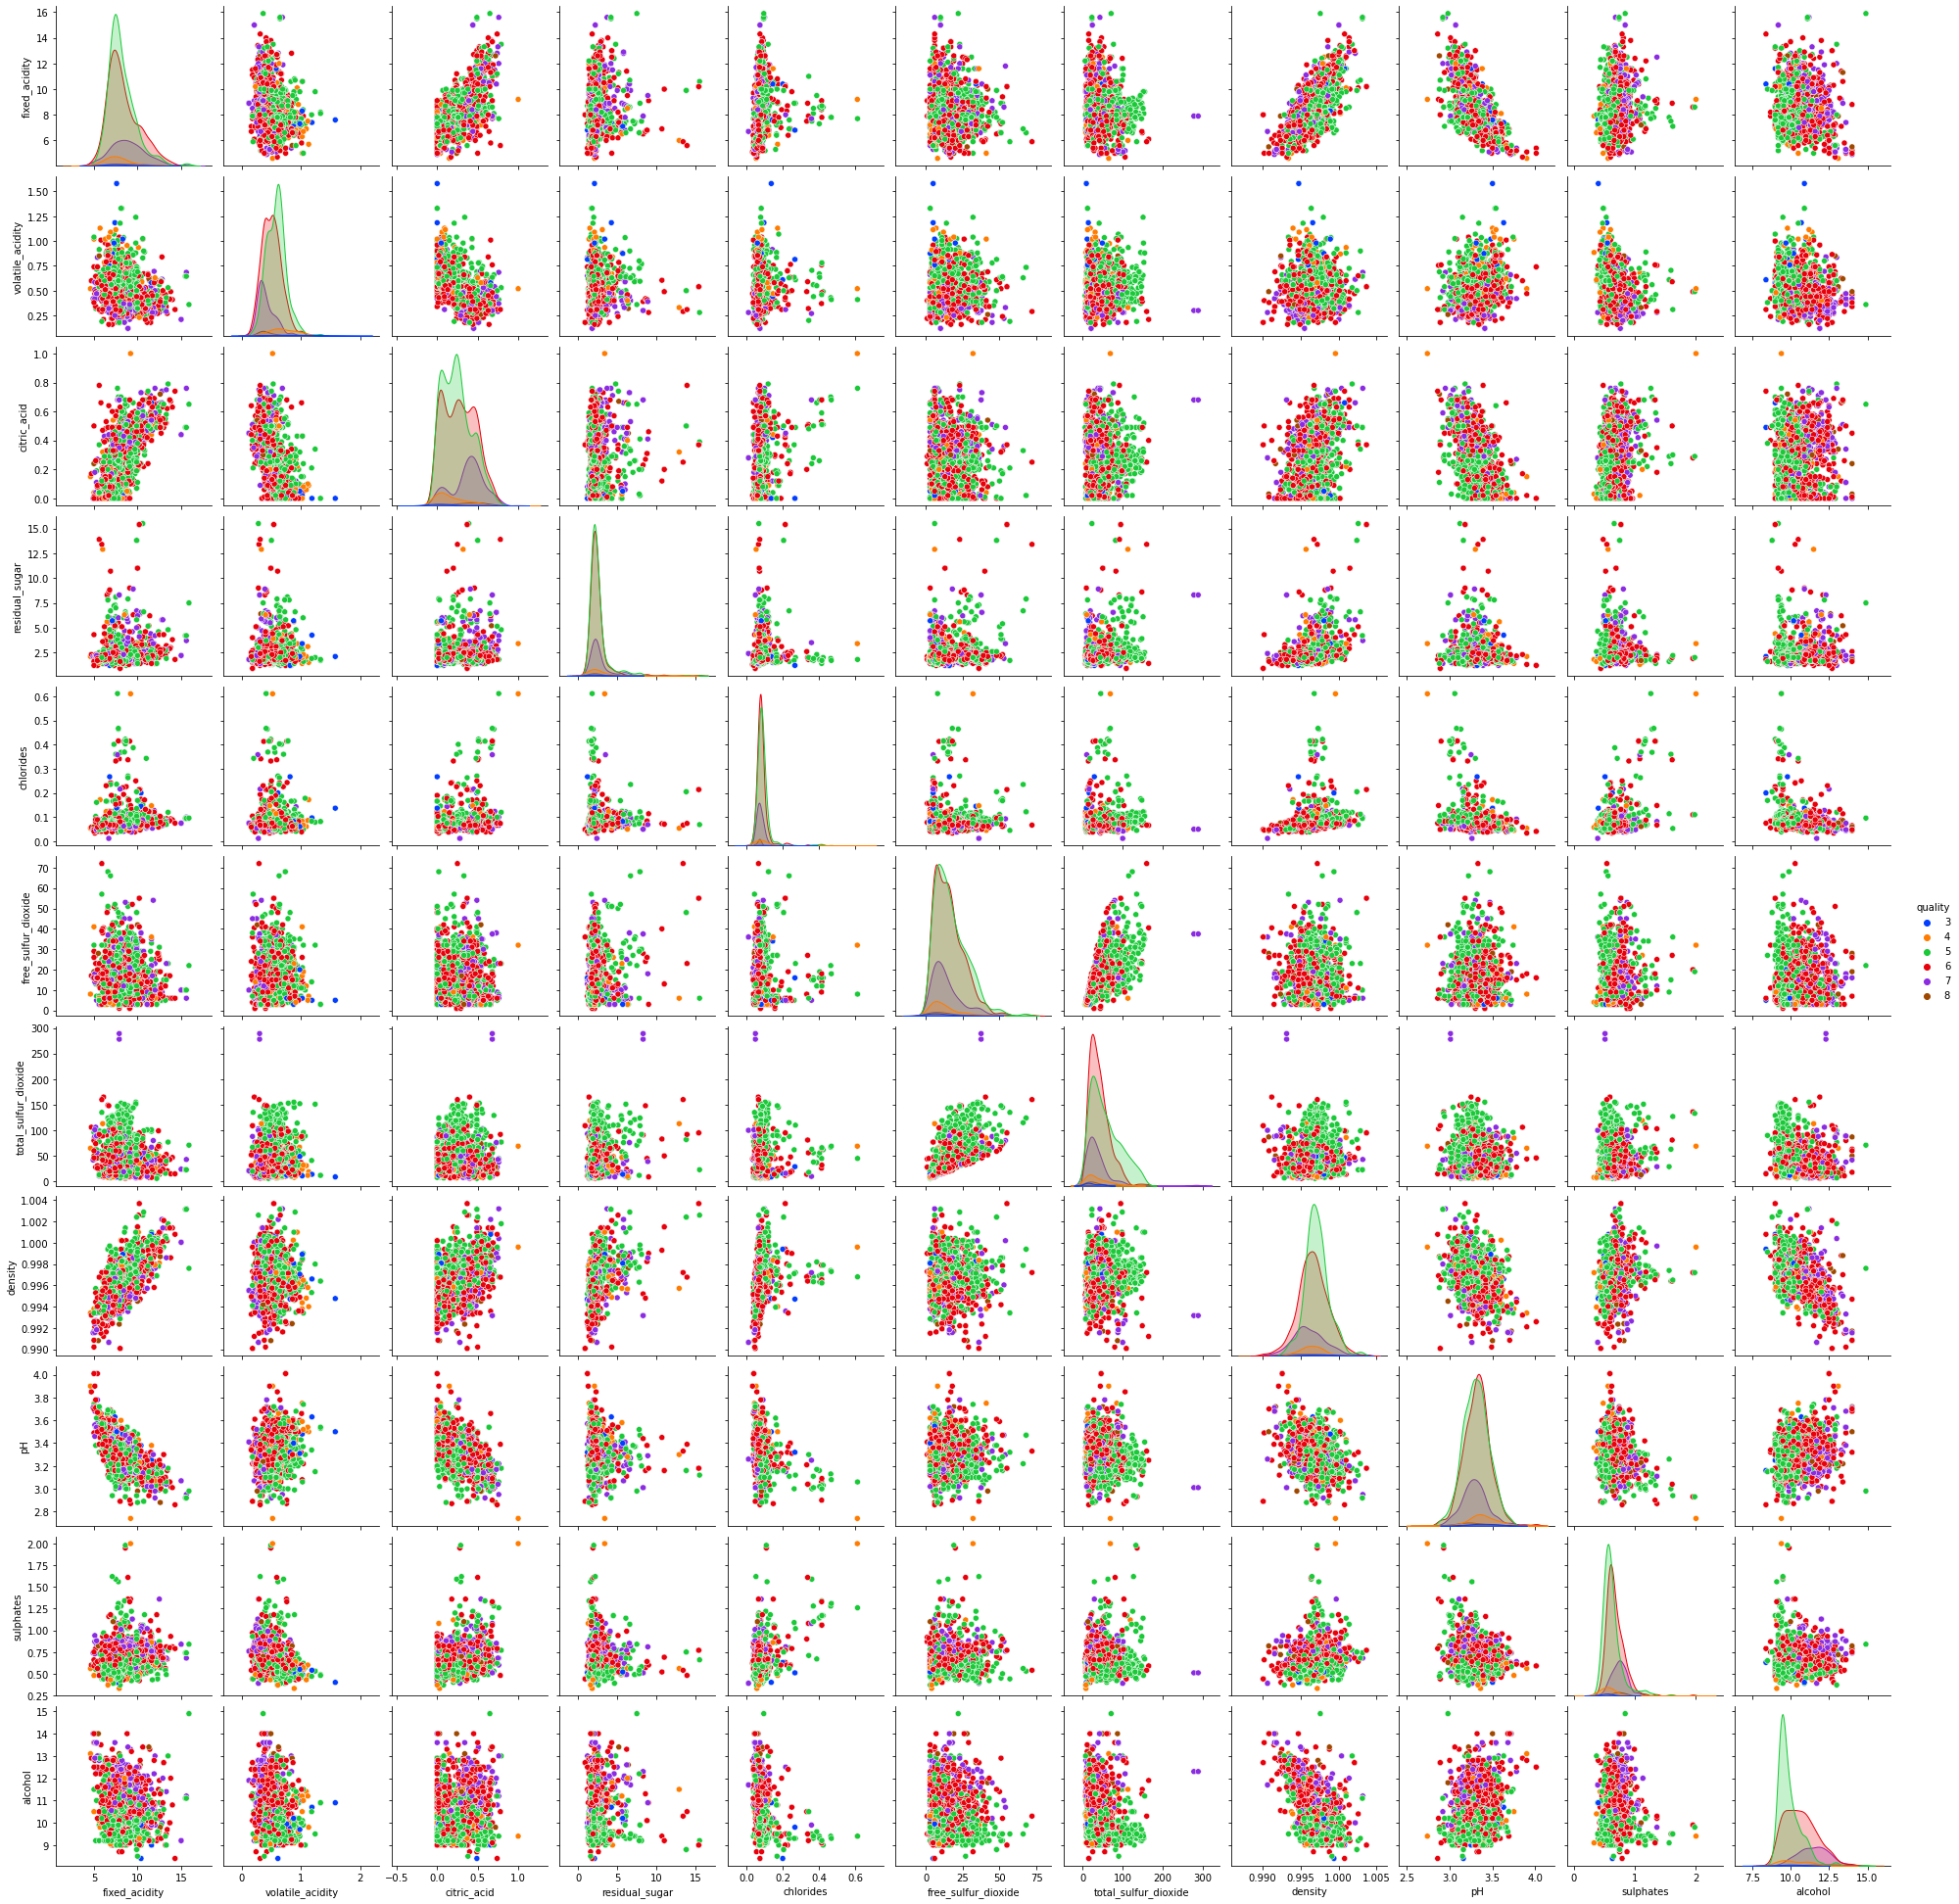

In [43]:
sns.pairplot(df, diag_kind='kde', hue='quality', palette='bright')

## check Info.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## check Null values.

In [45]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## The classes, target variable is given (i.e, quality) lets separate it.

In [46]:
dff = df.drop('quality',axis=1)
dff.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## lets scale the data using z-score scaling.

In [47]:
from scipy.stats import zscore

In [48]:
df_scaled = dff.apply(zscore)
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


### Now the data is scaled lets proceed with building the Agglomerative clustering models for different combinations of features.

## `1.Use feautes fixed acidity and volatile acidity.`

In [49]:
df1 = df_scaled[['fixed_acidity','volatile_acidity']]
df1.head()

,fixed_acidity,volatile_acidity
0,-0.528360,0.961877
1,-0.298547,1.967442
2,-0.298547,1.297065
3,1.654856,-1.384443
4,-0.528360,0.961877


## lets plot dendogram for identifying the number of clusters.

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram

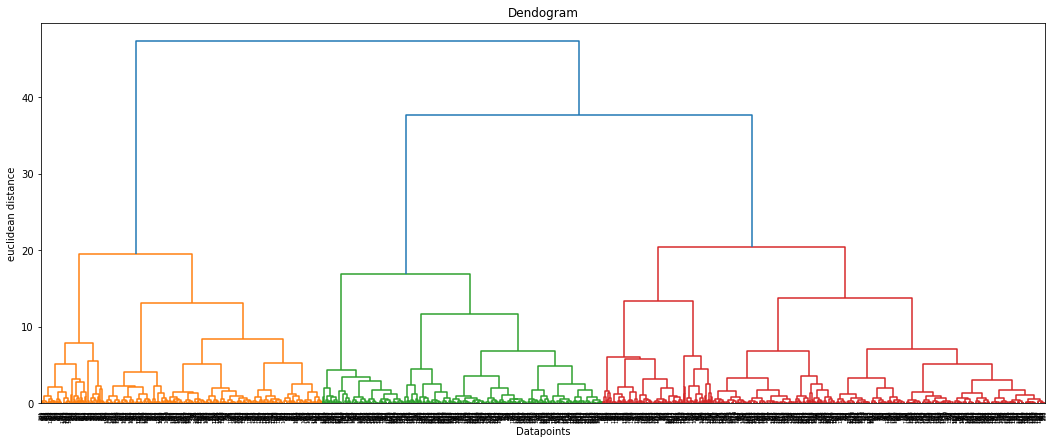

In [51]:
plt.figure(figsize=[18,7])
merg = linkage(df1,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 4 different classes.

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [85]:
## Building the Agglomerative clustering model with 4 clusters.
hierar = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

hierar.fit(df1)

AgglomerativeClustering(n_clusters=4)

In [86]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,1
1,3
2,3
3,0
4,1


In [89]:
## joining the df1 and label_df.
df1 = df1.join(label_df)

In [90]:
df1['label'].value_counts()

1    530
0    448
2    447
3    174
Name: label, dtype: int64

<AxesSubplot:xlabel='fixed_acidity', ylabel='volatile_acidity'>

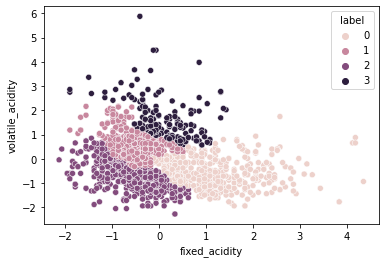

In [91]:
sns.scatterplot(x='fixed_acidity',y='volatile_acidity',hue='label',data=df1)

## `2.Use feautes Cirtic acidity and fixed acidity`

In [58]:
df2 = df_scaled[['citric_acid','fixed_acidity']]
df2.head()

,citric_acid,fixed_acidity
0,-1.391472,-0.528360
1,-1.391472,-0.298547
2,-1.186070,-0.298547
3,1.484154,1.654856
4,-1.391472,-0.528360


## lets plot dendogram for identifying the number of clusters.

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

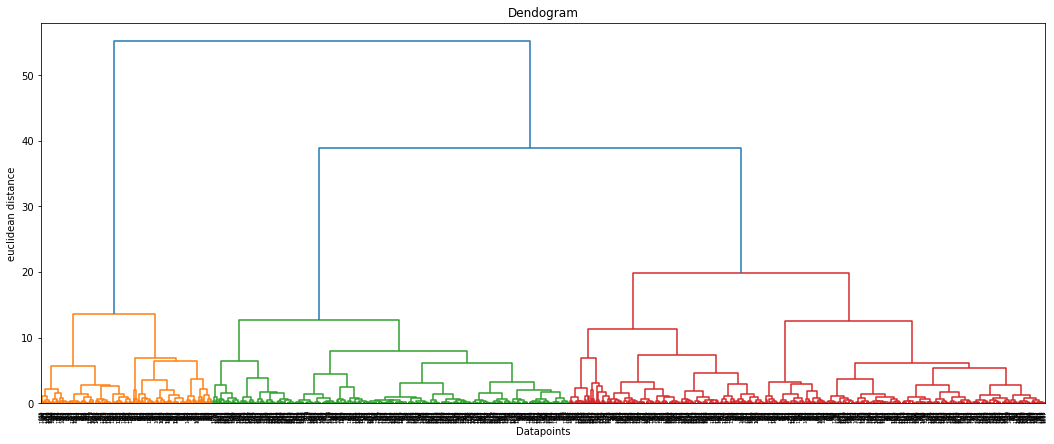

In [60]:
plt.figure(figsize=[18,7])
merg = linkage(df2,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 4 different classes.

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
## Building the Agglomerative clustering model with 4 clusters.
hierar = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

hierar.fit(df2)

AgglomerativeClustering(n_clusters=4)

In [93]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,1
1,1
2,1
3,0
4,1


In [96]:
## joining the df1 and label_df.
df2 = df2.join(label_df)

In [97]:
df2['label'].value_counts()

1    569
2    446
3    311
0    273
Name: label, dtype: int64

<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

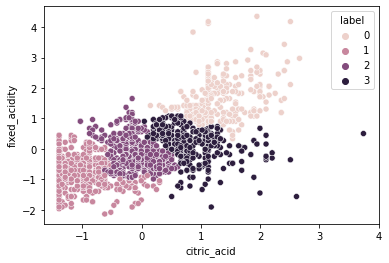

In [98]:
sns.scatterplot(x='citric_acid',y='fixed_acidity',hue='label',data=df2)

## `3. Use feautes residual suger and sulphades.`

In [99]:
df3 = df_scaled[['residual_sugar','sulphates']]
df3.head()

,residual_sugar,sulphates
0,-0.453218,-0.579207
1,0.043416,0.128950
2,-0.169427,-0.048089
3,-0.453218,-0.461180
4,-0.453218,-0.579207


## lets plot dendogram for identifying the number of clusters.

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram

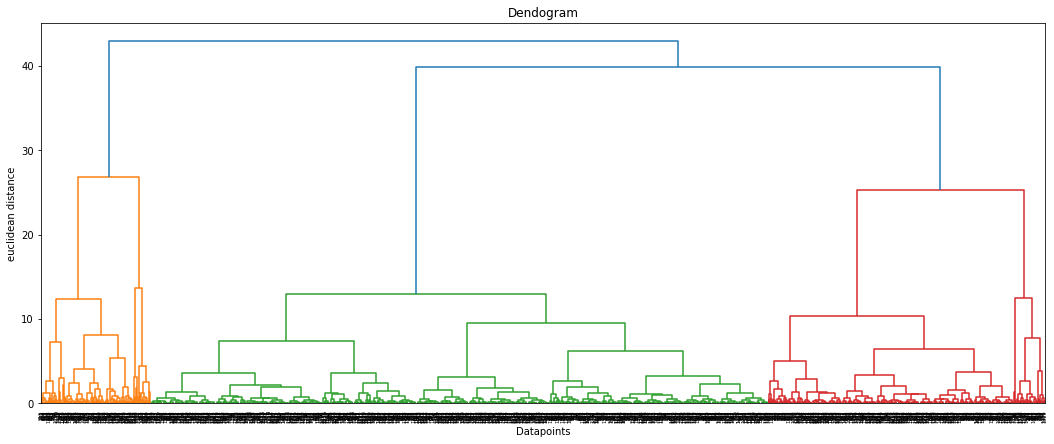

In [69]:
plt.figure(figsize=[18,7])
merg = linkage(df3,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 4 different classes.

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [101]:
## Building the Agglomerative clustering model with 4 clusters.
hierar = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

hierar.fit(df3)

AgglomerativeClustering(n_clusters=4)

In [102]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,2
1,0
2,2
3,2
4,2


In [104]:
## joining the df1 and label_df.
df3 = df3.join(label_df)

In [105]:
df3['label'].value_counts()

2    983
0    441
3    147
1     28
Name: label, dtype: int64

<AxesSubplot:xlabel='residual_sugar', ylabel='sulphates'>

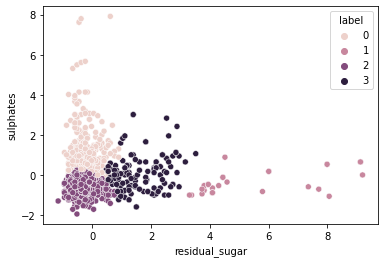

In [106]:
sns.scatterplot(x='residual_sugar',y='sulphates',hue='label',data=df3)

## `4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide`.

In [108]:
df_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777


In [110]:
df4 = df_scaled[['free_sulfur_dioxide','total_sulfur_dioxide']]
df4.head()

,free_sulfur_dioxide,total_sulfur_dioxide
0,-0.466193,-0.379133
1,0.872638,0.624363
2,-0.083669,0.229047
3,0.107592,0.411500
4,-0.466193,-0.379133


## lets plot dendogram for identifying the number of clusters.

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram

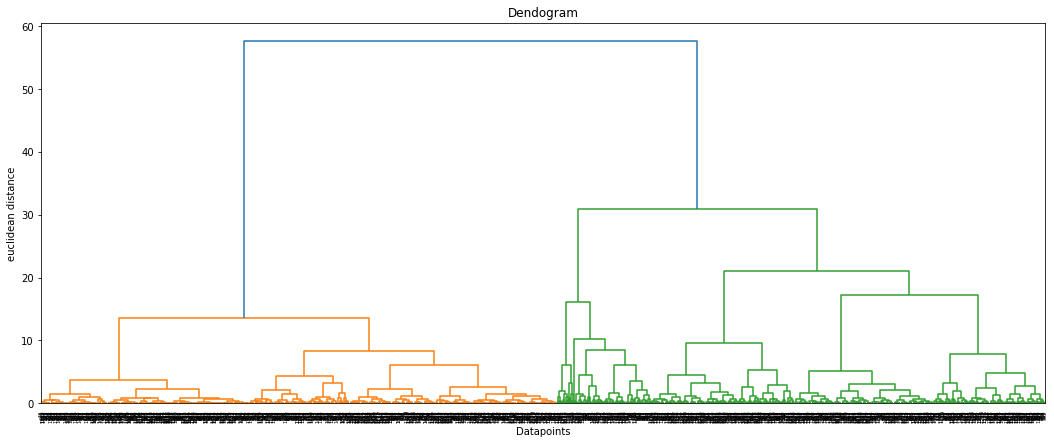

In [111]:
plt.figure(figsize=[18,7])
merg = linkage(df4,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 3 different classes.

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
## Building the Agglomerative clustering model with 4 clusters.
hierar = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hierar.fit(df4)

AgglomerativeClustering(n_clusters=3)

In [114]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,1
1,0
2,0
3,0
4,1


In [115]:
## joining the df1 and label_df.
df4 = df4.join(label_df)

In [116]:
df4['label'].value_counts()

1    822
0    628
2    149
Name: label, dtype: int64

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='total_sulfur_dioxide'>

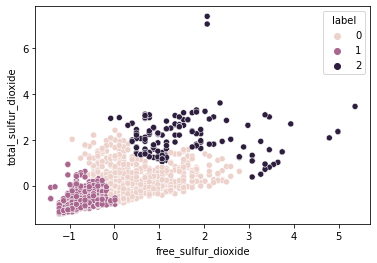

In [117]:
sns.scatterplot(x='free_sulfur_dioxide',y='total_sulfur_dioxide',hue='label',data=df4)

## `5. Use feautes fixed acidity, citric acidity and volatile acidity.`

In [108]:
df_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777


In [118]:
df5 = df_scaled[['fixed_acidity','citric_acid','volatile_acidity']]
df5.head()

,fixed_acidity,citric_acid,volatile_acidity
0,-0.528360,-1.391472,0.961877
1,-0.298547,-1.391472,1.967442
2,-0.298547,-1.186070,1.297065
3,1.654856,1.484154,-1.384443
4,-0.528360,-1.391472,0.961877


## lets plot dendogram for identifying the number of clusters.

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram

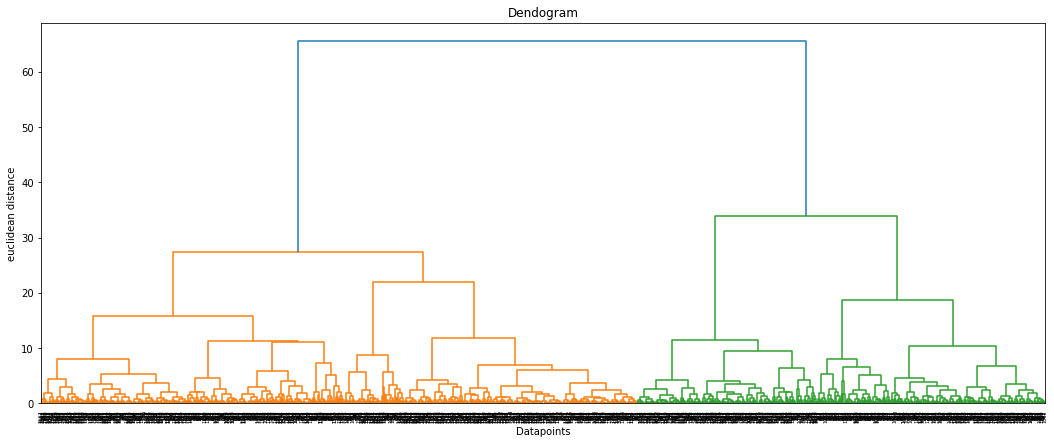

In [119]:
plt.figure(figsize=[18,7])
merg = linkage(df5,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 3 different classes.

In [120]:
from sklearn.cluster import AgglomerativeClustering

In [121]:
## Building the Agglomerative clustering model with 4 clusters.
hierar = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hierar.fit(df5)

AgglomerativeClustering(n_clusters=3)

In [122]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,0
1,0
2,0
3,1
4,0


In [123]:
## joining the df1 and label_df.
df5 = df5.join(label_df)

In [124]:
df5['label'].value_counts()

0    949
1    363
2    287
Name: label, dtype: int64

<AxesSubplot:xlabel='fixed_acidity', ylabel='citric_acid'>

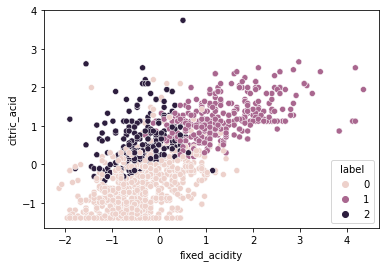

In [125]:
sns.scatterplot(x='fixed_acidity',y='citric_acid',hue='label',data=df5)

## `6. Use features density and pH.`

In [108]:
df_scaled.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777


In [126]:
df6 = df_scaled[['density','pH']]
df6.head()

,density,pH
0,0.558274,1.288643
1,0.028261,-0.719933
2,0.134264,-0.331177
3,0.664277,-0.979104
4,0.558274,1.288643


## lets plot dendogram for identifying the number of clusters.

In [127]:
from scipy.cluster.hierarchy import linkage, dendrogram

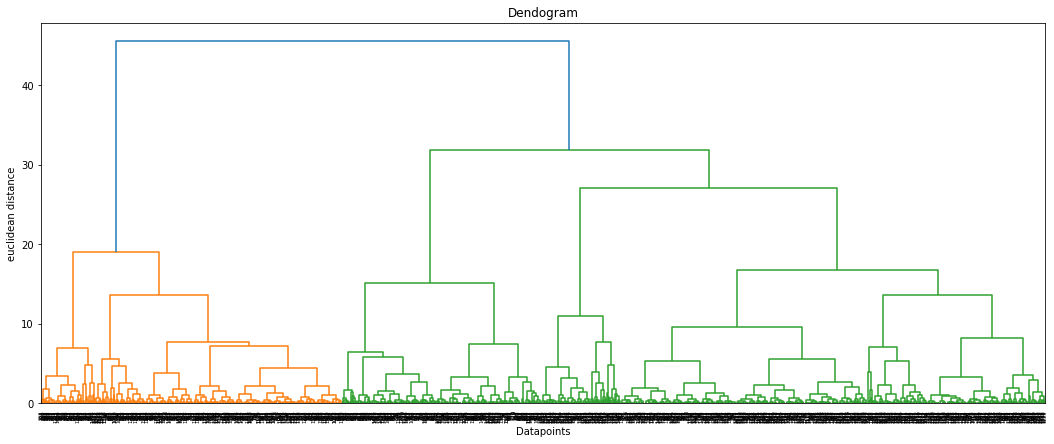

In [128]:
plt.figure(figsize=[18,7])
merg = linkage(df6,method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('euclidean distance')
plt.show()

## From the above dendogram, we can see there are 3 different classes.

In [120]:
from sklearn.cluster import AgglomerativeClustering

In [129]:
## Building the Agglomerative clustering model with 3 clusters.
hierar = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hierar.fit(df6)

AgglomerativeClustering(n_clusters=3)

In [130]:
## creating the labels dataframe.
label_df = pd.DataFrame(hierar.labels_, columns=['label'])
label_df.head()

,label
0,2
1,1
2,1
3,1
4,2


In [131]:
## joining the df1 and label_df.
df6 = df6.join(label_df)

In [132]:
df6['label'].value_counts()

0    803
1    480
2    316
Name: label, dtype: int64

<AxesSubplot:xlabel='density', ylabel='pH'>

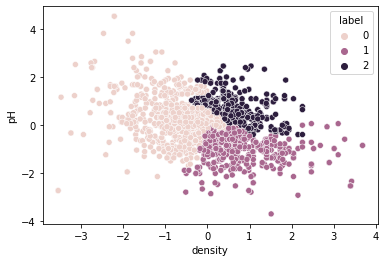

In [134]:
sns.scatterplot(x='density',y='pH',hue='label',data=df6)